In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

In [2]:
df = pd.read_csv('candy-data.csv')

In [3]:
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [4]:
df.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [5]:
df.shape

(85, 13)

In [9]:
dff = df.duplicated().sum()

In [10]:
dff

np.int64(0)

In [ ]:
# y = df['chocolate']
# x = df.drop(columns=[])

In [38]:
df = df.drop(columns=['competitorname'])

In [11]:
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [39]:
trainingSet, testSet = train_test_split(df, test_size = 0.2)


In [40]:
train_df = trainingSet
test_df = testSet

In [41]:
x_train = train_df.drop(columns='chocolate')
y_train = train_df['chocolate']
x_test = test_df.drop(columns='chocolate')
y_test = test_df['chocolate']

In [42]:
x_train.head()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
66,1,0,0,0,0,0,0,1,0.069,0.116,59.863998
82,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
47,0,0,1,0,0,0,0,1,0.593,0.651,69.483788
32,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
22,0,0,0,0,0,0,0,1,0.127,0.093,55.375454


In [43]:
y_train.value_counts()

chocolate
0    40
1    28
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_20904\2009333551.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "chocolate", data=train_df, palette='Blues_d')


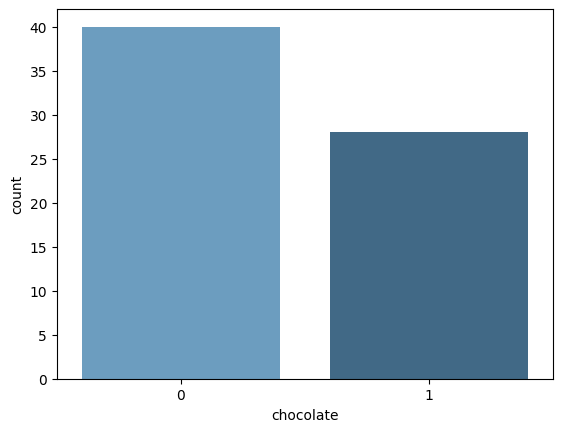

<Figure size 640x480 with 0 Axes>

In [44]:
sns.countplot(x = "chocolate", data=train_df, palette='Blues_d')
plt.show()
plt.savefig('Count_plot')

In [45]:
count_no_choc = len(train_df[train_df['chocolate']==0])
count_choc = len(train_df[train_df['chocolate']==1])
pct_of_no_choc = count_no_choc/(count_no_choc+count_choc)
print("Percentage of no chocolate is ", pct_of_no_choc*100)
pct_of_choc = count_choc/(count_no_choc+count_choc)
print("Percentage of Chocolate", pct_of_choc*100)

Percentage of no chocolate is  58.82352941176471
Percentage of Chocolate 41.17647058823529


In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [48]:
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)



In [49]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[8, 0],
       [4, 5]])

In [51]:
print("Accuracy : " , metrics.accuracy_score(y_test, y_pred))
print("Precision : " , metrics.precision_score(y_test, y_pred))
print("Recall : ", metrics.recall_score(y_test, y_pred))

Accuracy :  0.7647058823529411
Precision :  1.0
Recall :  0.5555555555555556
